In [134]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse

from astropy import units as u
from astropy.table import Table
from astropy.time import Time
import lightkurve as lk
from matplotlib.collections import LineCollection
from tqdm import tqdm_notebook

import glob, os

from astropy.table import Table
plt.rcParams['font.size'] = 20
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['savefig.dpi']= 300             #72 
# mpl.rcParams["font.family"] = "Computer Modern Roman"
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
data = Table.read('joined_lofar.csv',format='ascii')

In [3]:
lit, measured = data['Literature Rotation Period'],data['Rotation Period']

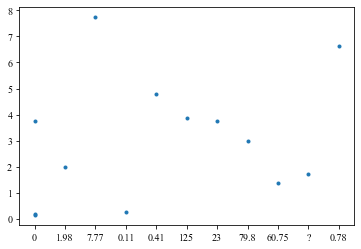

In [4]:
plt.plot(lit,measured,'.')

In [5]:
xray= np.array(data['Soft X-ray Lum (x1E28 ergs/s)'])
radio = np.array(data['LOFAR Lum (x1E14 ergs/s/Hz)'])
dradio = np.array(data['Uncert. Lofar Lum'])
flarerate = np.array(data['Flare Rate'])
names = np.array(data['Name'])

quiescent = ['GJ 625', 'GJ 450', 'GJ 1151', 'LP 169-22', 'G 240-45']
binaries = ['DG CVn', 'CR Dra']

In [6]:
uplims = ['<' in xr for xr in xray]
xrayclean = [float((xr).strip('<')) for xr in xray]

/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


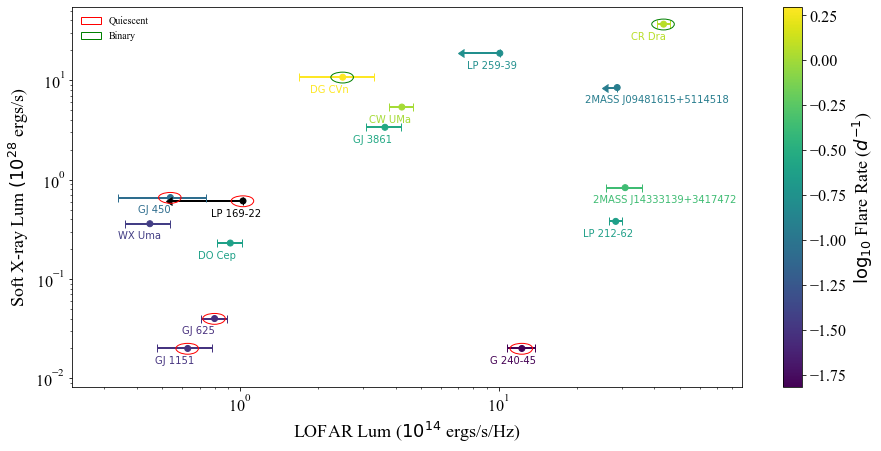

In [7]:
fig = plt.figure(figsize=(15.0,7.0))
ax = plt.gca()

this_mappable = np.log10((flarerate))
bad = ~np.isfinite(this_mappable)
this_mappable[bad] = np.nan

vmin,vmax = np.nanmin(this_mappable),np.nanmax(this_mappable)
this_mappable[bad] = -10

thismap = mpl.cm.viridis
thismap.set_bad(color='k')

sc = plt.scatter(radio,xrayclean,c=this_mappable,cmap=thismap)
sc.cmap.set_under('k')
sc.set_clim(vmin, vmax)

#create colorbar according to the scatter plot
clb = plt.colorbar(sc)
clb.set_label(r'$\log_{10}$ Flare Rate ($d^{-1}$)',fontsize=18)
clb.ax.tick_params(labelsize=16) 

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=thismap)
this_mappable[bad] = np.nan
color = np.array([(mapper.to_rgba(v)) for v in this_mappable])

for j in range(15):
    plt.errorbar(radio[j],xrayclean[j],xerr=dradio[j],xuplims=uplims[j],ls='None',c=color[j], lw=2, capsize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(radio)*0.5,np.max(radio)*2)
plt.xlabel('LOFAR Lum ($10^{14}$ ergs/s/Hz)',fontsize=18)
plt.ylabel(r'Soft X-ray Lum $(10^{28}$ ergs/s)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for j, star in enumerate(names):
    wh = np.where(names==star)[0][0]
    plt.text(radio[wh]*0.75,xrayclean[wh]*0.7,star,fontsize=10,c=color[j],fontname='DejaVu Sans')
# fig.colorbar(mpl.cm.ScalarMappable(norm=None,cmap=mpl.cm.hot(flarerate)))

for j, star in enumerate(quiescent):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    f = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='r',zorder=11,
               transform=ax.transData)
    fig.add_artist(f)

    
for j, star in enumerate(binaries):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    g = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='g',zorder=11,
               transform=ax.transData)
    fig.add_artist(g)

plt.legend([f,g],['Quiescent','Binary'],frameon=False)
plt.savefig('gudel_benz_flares.png',bbox_inches='tight')
plt.savefig('gudel_benz_flares.pdf',bbox_inches='tight')

In [8]:
gudel_m_dwarfs = Table.read('../data/m_dwarfs_gudel2002.csv',format='ascii')
gudel_k_dwarfs = Table.read('../data/k_dwarfs_gudel2002.csv',format='ascii')
gudel_fk_com = Table.read('../data/fk_com_gudel2002.csv',format='ascii')
gudel_rs_cvns = Table.read('../data/rs_cvns_gudel2002.csv',format='ascii')
gudel_by_dra = Table.read('../data/by_dra_gudel2002.csv',format='ascii')

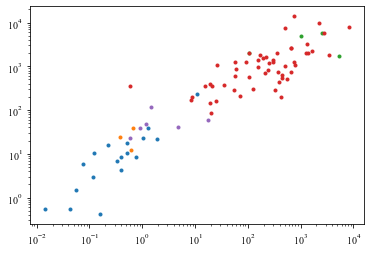

In [9]:
plt.plot(gudel_m_dwarfs['col1']/1.0e14,gudel_m_dwarfs['col2']/1.0e28,'.')
plt.plot(gudel_k_dwarfs['col1']/1.0e14,gudel_k_dwarfs['col2']/1.0e28,'.')
plt.plot(gudel_fk_com['col1']/1.0e14,gudel_fk_com['col2']/1.0e28,'.')

plt.plot(gudel_rs_cvns['col1']/1.0e14,gudel_rs_cvns['col2']/1.0e28,'.')
plt.plot(gudel_by_dra['col1']/1.0e14,gudel_by_dra['col2']/1.0e28,'.')

plt.xscale('log')
plt.yscale('log')

/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


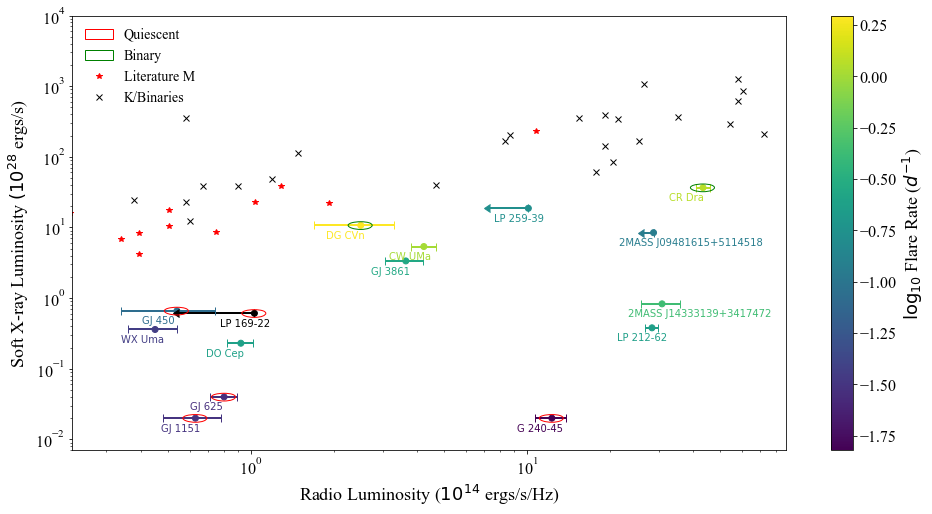

In [135]:
fig = plt.figure(figsize=(16.0,8.0))
ax = plt.gca()

this_mappable = np.log10((flarerate))
bad = ~np.isfinite(this_mappable)
this_mappable[bad] = np.nan

vmin,vmax = np.nanmin(this_mappable),np.nanmax(this_mappable)
this_mappable[bad] = -10

thismap = mpl.cm.viridis
thismap.set_bad(color='k')

sc = plt.scatter(radio,xrayclean,c=this_mappable,cmap=thismap)
sc.cmap.set_under('k')
sc.set_clim(vmin, vmax)

#create colorbar according to the scatter plot
clb = plt.colorbar(sc)
clb.set_label(r'$\log_{10}$ Flare Rate ($d^{-1}$)',fontsize=18)
clb.ax.tick_params(labelsize=16) 

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=thismap)
this_mappable[bad] = np.nan
color = np.array([(mapper.to_rgba(v)) for v in this_mappable])

for j in range(15):
    plt.errorbar(radio[j],xrayclean[j],xerr=dradio[j],xuplims=uplims[j],ls='None',c=color[j], lw=2, capsize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.min(radio)*0.5,np.max(radio)*2)
plt.xlabel('Radio Luminosity ($10^{14}$ ergs/s/Hz)',fontsize=18)
plt.ylabel(r'Soft X-ray Luminosity $(10^{28}$ ergs/s)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for j, star in enumerate(names):
    wh = np.where(names==star)[0][0]
    plt.text(radio[wh]*0.75,xrayclean[wh]*0.65,star,fontsize=10,c=color[j],fontname='DejaVu Sans')
# fig.colorbar(mpl.cm.ScalarMappable(norm=None,cmap=mpl.cm.hot(flarerate)))

for j, star in enumerate(quiescent):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    f = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='r',zorder=11,
               transform=ax.transData)
    fig.add_artist(f)

    
for j, star in enumerate(binaries):
    wh = np.where(names==star)[0][0]
    xy = (radio[wh],xrayclean[wh])
    g = Ellipse(xy=xy,width=radio[wh]/5.,height=xrayclean[wh]/4.,angle=0,fc='None',edgecolor='g',zorder=11,
               transform=ax.transData)
    fig.add_artist(g)


mm = plt.plot(gudel_m_dwarfs['col1']/1.0e14,gudel_m_dwarfs['col2']/1.0e28,'*r')
kk = plt.plot(gudel_k_dwarfs['col1']/1.0e14,gudel_k_dwarfs['col2']/1.0e28,'xk')
plt.plot(gudel_fk_com['col1']/1.0e14,gudel_fk_com['col2']/1.0e28,'xk')

plt.plot(gudel_rs_cvns['col1']/1.0e14,gudel_rs_cvns['col2']/1.0e28,'xk')
plt.plot(gudel_by_dra['col1']/1.0e14,gudel_by_dra['col2']/1.0e28,'xk')

# plt.legend([f,g,mm[0],kk[0]],['Quiescent','Binary','Literature M','K/Binaries'],frameon=False,loc=2)
plt.legend([f,g,mm[0],kk[0]],['Quiescent','Binary','Literature M','K/Binaries'],
           framealpha=1,edgecolor='white',loc=2,fontsize=14)

plt.ylim(0.7e-2,1e4)

plt.savefig('gudel_benz_flares_context.png',bbox_inches='tight')
plt.savefig('gudel_benz_flares_context.pdf',bbox_inches='tight')

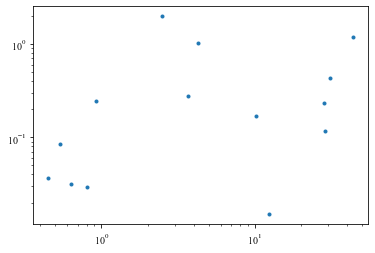

In [11]:
plt.plot(radio,flarerate,'.')
plt.xscale('log')
plt.yscale('log')

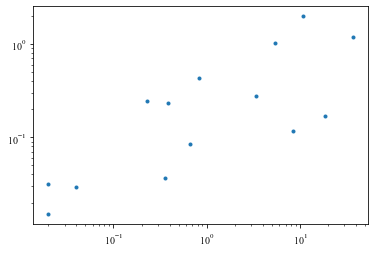

In [12]:
plt.plot(xrayclean,flarerate,'.')
plt.xscale('log')
plt.yscale('log')

In [130]:
all_lcs = []
all_preds = []
for star in quiescent:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?
    print(search)
    lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('avg_preds_%s_%d.csv' % (star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds[0])

Doing GJ 625
SearchResult containing 3 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 16   207492082 tess2019253231442-s0016-0000000207492082-0152-s_lc.fits      0.0
  1 TESS Sector 23   207492082 tess2020078014623-s0023-0000000207492082-0177-s_lc.fits      0.0
  2 TESS Sector 25   207492082 tess2020133194932-s0025-0000000207492082-0182-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing GJ 450
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 22   144400022 tess2020049080258-s0022-0000000144400022-0174-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing GJ 1151
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 22    11893637 tess2020049080258-s0022-0000000011893637-0174-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing LP 169-22
SearchResult containing 2 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   148673115 tess2020020091053-s0021-0000000148673115-0167-s_lc.fits      0.0
  1 TESS Sector 22   148673115 tess2020049080258-s0022-0000000148673115-0174-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing G 240-45
SearchResult containing 11 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 14   307957392 tess2019198215352-s0014-0000000307957392-0150-s_lc.fits      0.0
  1 TESS Sector 15   307957392 tess2019226182529-s0015-0000000307957392-0151-s_lc.fits      0.0
  2 TESS Sector 16   307957392 tess2019253231442-s0016-0000000307957392-0152-s_lc.fits      0.0
  3 TESS Sector 17   307957392 tess2019279210107-s0017-0000000307957392-0161-s_lc.fits      0.0
  4 TESS Sector 18   307957392 tess2019306063752-s0018-0000000307957392-0162-s_lc.fits      0.0
  5 TESS Sector 19   307957392 tess2019331140908-s0019-0000000307957392-0164-s_lc.fits      0.0
  6 TESS Sector 21   307957392 tess2020020091053-s0021-0000000307957392-0167-s_lc.fits      0.0
  7 TESS Sector 22   307957392 tess2020049080258-s0022-0000000307957392-0174-s

/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


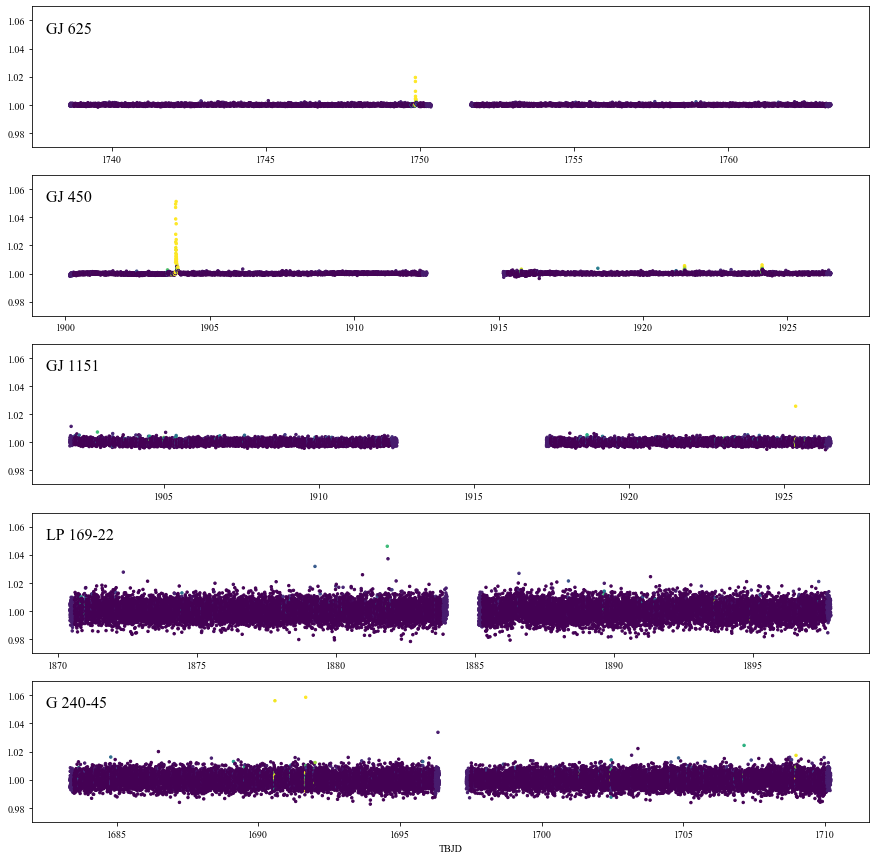

In [131]:
fig, axes = plt.subplots(5,1,figsize=(15,15))
for j, lc in enumerate(all_lcs):
#     lcc = lc.remove_nans()
    ax = axes[j]
    ax.set_rasterized(True)
    ax.scatter(lc.time,lc.flux,c=all_preds[j],label=quiescent[j],vmin=0, vmax=1, s=6)
    leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
    for item in leg.legendHandles:
        item.set_visible(False)
    ax.set_ylim(0.97,1.07)
    if j == 4:
        ax.set_xlabel('TBJD')
        
plt.savefig('quiescent_stars_1_sector.png',bbox_inches='tight',rasterized=True)
plt.savefig('quiescent_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)

In [200]:
all_lcs = []
all_preds = []

active = [x for x in list(data['Name']) if x not in quiescent]
# active = [x for x in active if x not in ['DO Cep']]

for star in active:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?
    print(search)
    lcs = search[0].download().PDCSAP_FLUX.normalize().remove_nans()#.download_all().stitch()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('avg_preds_%s_%d.csv' % (star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds[0])

Doing 2MASS J09481615+5114518
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   453430899 tess2020020091053-s0021-0000000453430899-0167-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing 2MASS J14333139+3417472
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 23   409372963 tess2020078014623-s0023-0000000409372963-0177-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing CR Dra
SearchResult containing 4 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 16   207436278 tess2019253231442-s0016-0000000207436278-0152-s_lc.fits      0.0
  1 TESS Sector 23   207436278 tess2020078014623-s0023-0000000207436278-0177-s_lc.fits      0.0
  2 TESS Sector 24   207436278 tess2020106103520-s0024-0000000207436278-0180-s_lc.fits      0.0
  3 TESS Sector 25   207436278 tess2020133194932-s0025-0000000207436278-0182-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing CW UMa
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 22    85334035 tess2020049080258-s0022-0000000085334035-0174-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing DG CVn
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 23   368129164 tess2020078014623-s0023-0000000368129164-0177-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing DO Cep
SearchResult containing 3 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 16   414587194 tess2019253231442-s0016-0000000414587194-0152-s_lc.fits      0.0
  1 TESS Sector 17   414587194 tess2019279210107-s0017-0000000414587194-0161-s_lc.fits      0.0
  2 TESS Sector 24   414587194 tess2020106103520-s0024-0000000414587194-0180-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing GJ 3861
SearchResult containing 3 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 15   298164374 tess2019226182529-s0015-0000000298164374-0151-s_lc.fits      0.0
  1 TESS Sector 16   298164374 tess2019253231442-s0016-0000000298164374-0152-s_lc.fits      0.0
  2 TESS Sector 23   298164374 tess2020078014623-s0023-0000000298164374-0177-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing LP 212-62
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   392365135 tess2020020091053-s0021-0000000392365135-0167-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing LP 259-39
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   166597074 tess2020020091053-s0021-0000000166597074-0167-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


Doing WX Uma
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   252803603 tess2020020091053-s0021-0000000252803603-0167-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


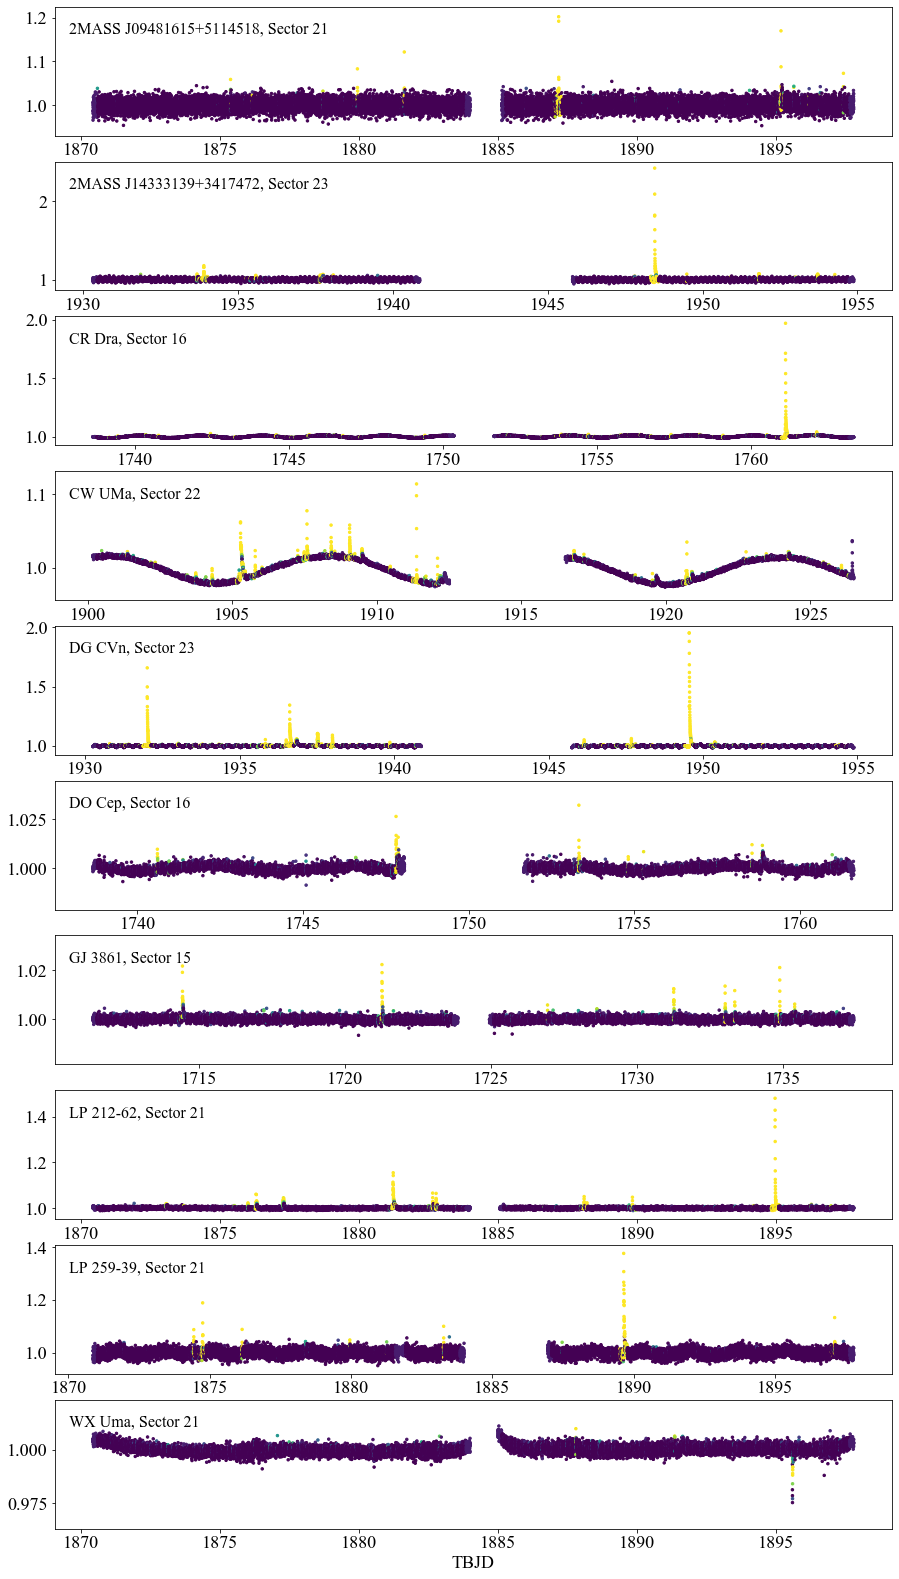

In [203]:
fig, axes = plt.subplots(10,1,figsize=(15,28))
plt.rcParams['font.size'] = 18

for j, lc in enumerate(all_lcs):
    try:
        lcc = lc.remove_nans()
        ax = axes[j]
        ax.set_rasterized(True)
        ax.scatter(lcc.time,lcc.flux,c=all_preds[j],label='%s, Sector %d' % (active[j],lcc.sector),vmin=0, vmax=1, s=6)
        leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
        for item in leg.legendHandles:
            item.set_visible(False)

#         ax.set_ylim(0.93,1.1)
        if j == 9:
            ax.set_xlabel('TBJD')
    except:
        lcc = lc.remove_nans()
        ax = axes[j]
        ax.set_rasterized(True)
        ax.plot(lcc.time,lcc.flux,'.k',label='%s, Sector %d' % (active[j],lcc.sector),markersize=6)
        leg = ax.legend(frameon=False,loc=2,fontsize=16)
#         ax.set_ylim(0.93,1.1)
        if j == 9:
            ax.set_xlabel('TBJD')

plt.savefig('active_stars_1_sector.png',bbox_inches='tight',rasterized=True)
plt.savefig('active_stars_1_sector.pdf',bbox_inches='tight',rasterized=True)

## Now let's do the simultaneous ones

In [181]:
stars_simultaneous = {'GJ 450':'2020-03-16T20:11:00',
         '2MASS J09481615+5114518':'2020-01-31T20:45:40'}
simultaneous = stars_simultaneous.keys()

all_lcs = []
all_preds = []

for star in simultaneous:
    print('Doing %s' % star)
    tic = data['TIC'][np.where(data['Name']==star)]
    search = lk.search_lightcurvefile('TIC %d' % tic) # why is the TIC wrong?
    print(search)
    lcs = search[0].download_all().stitch().remove_nans().normalize()
    all_lcs.append(lcs)
    avg_preds = []
    for j in range(len(search)):
        avg_preds.append(Table.read('avg_preds_%s_%d.csv' % (star.replace(' ','_').lower(), j))['avg_preds'].data)
    avg_preds = np.array(avg_preds)
    all_preds.append(avg_preds)

Doing GJ 450
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 22   144400022 tess2020049080258-s0022-0000000144400022-0174-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/collections.py:213: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurve.py:702: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


Doing 2MASS J09481615+5114518
SearchResult containing 1 data products.

 #   observation   target_name                     productFilename                     distance
--- -------------- ----------- ------------------------------------------------------- --------
  0 TESS Sector 21   453430899 tess2020020091053-s0021-0000000453430899-0167-s_lc.fits      0.0


/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/collections.py:213: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Using PDCSAP_FLUX. You can remove this warning by explicitely using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)
/Users/benjaminpope/opt/anaconda3/lib/python3.7/site-packages/lightkurve-2.0.1.dev0-py3.7.egg/lightkurve/lightcurve.py:702: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


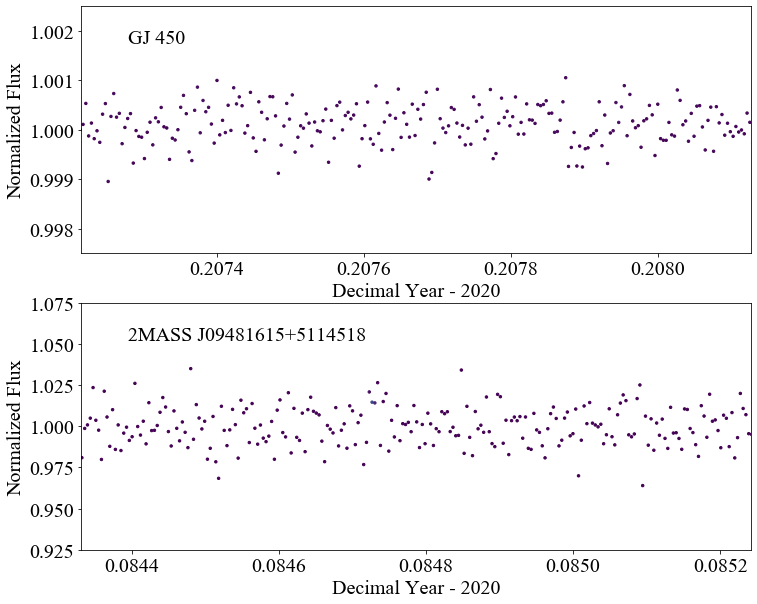

In [197]:
fig, axes = plt.subplots(2,1,figsize=(12.0,10.0))
from astropy.time import Time, TimeDelta

for j, star in enumerate(simultaneous):
    ax = axes[j]
    ax.set_rasterized(True)
    lc = all_lcs[j]
    tstart = stars_simultaneous[star]
    dates = lk.btjd_to_astropy_time(lc.time)
    t = Time(tstart, format='isot', scale='utc')
    dt = TimeDelta(3600.*8., format='sec')
    tfinish = t+dt
    
    ax.scatter(dates.decimalyear-2020,lc.flux,c=np.hstack(all_preds[j]),
                        vmin=0, vmax=1, s=6,label=star)
    ax.set_xlim(t.decimalyear-2020,tfinish.decimalyear-2020)
#     ax.axvline(t.decimalyear-2020)
#     ax.axvline(tfinish.decimalyear-2020)

    ax.set_xlabel('Decimal Year - 2020')
    ax.set_ylabel('Normalized Flux')
#     leg = ax.legend(frameon=False,loc=2,handlelength=0, handletextpad=0,fontsize=16)
    ax.annotate(star,xy=(0.07,0.85),xycoords='axes fraction' )
    # plt.ylim(0.98,1.01)
    # plt.xlim(t.decimalyear-2020-0.05,tfinish.decimalyear-2020+0.05)
#     a.colorbar()

axes[0].set_ylim(0.9975,1.0025)
axes[1].set_ylim(0.925,1.075)

plt.savefig('simultaneous_obs.png',bbox_inches='tight',rasterized=True)
plt.savefig('simultaneous_obs.pdf',bbox_inches='tight',rasterized=True)

## Now let's look at the overall flare-rate distribution using the Günther data.

In [189]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(s, xy, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.  *s* is a deprecated synonym for this
        parameter.
    
    xy : (float, float)
        The point *(x,y)* to annotate.
    
    xytext : (float, float), optional
        The position *(x,y)* to place the text at.
        If *None*, defaults to *xy*.
    
    xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional
    
        The coordinate system that *xy* is given in. The following types
        of values are supported:
    
        - One of the f